# IMDB movies review sentiment analysis using RNN 

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense

import warnings
warnings.filterwarnings("ignore")


We are only taking 1000 words from dataset

In [2]:
features = 10000
length = 500
batch_size = 32

In [3]:
(X_tr, y_tr),(X_te, y_te) = imdb.load_data(num_words = features)


In [4]:
X_tr.shape

(25000,)

In [5]:
len(X_tr[0])

218

In [6]:
len(X_tr[6343])

168

In [7]:
X_tr = sequence.pad_sequences(X_tr, maxlen=length)
X_te = sequence.pad_sequences(X_te, maxlen=length)

In [8]:
len(X_tr[0])

500

In [9]:
len(X_tr[6343])

500

we are choosing "sigmoid" because we need a binary output

In [10]:
model = Sequential([
    Embedding(features, 32),
    SimpleRNN(32),
    Dense(1,activation="sigmoid")
    ])

In [11]:
model.compile(optimizer="adam", loss= "binary_crossentropy", metrics=["accuracy"])

In [12]:
model.fit(X_tr, y_tr, epochs=20,batch_size= batch_size, validation_data=(X_te, y_te))

Epoch 1/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 34s 42ms/step - accuracy: 0.6014 - loss: 0.6507 - val_accuracy: 0.6326 - val_loss: 0.6284
Epoch 2/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 31s 40ms/step - accuracy: 0.7594 - loss: 0.5025 - val_accuracy: 0.7046 - val_loss: 0.5517
Epoch 3/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 31s 40ms/step - accuracy: 0.8449 - loss: 0.3565 - val_accuracy: 0.8450 - val_loss: 0.4029
Epoch 4/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 31s 40ms/step - accuracy: 0.9011 - loss: 0.2435 - val_accuracy: 0.8333 - val_loss: 0.3984
Epoch 5/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 31s 40ms/step - accuracy: 0.9429 - loss: 0.1601 - val_accuracy: 0.8217 - val_loss: 0.4889
Epoch 6/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 31s 40ms/step - accuracy: 0.9528 - loss: 0.1303 - val_accuracy: 0.7988 - val_loss: 0.5680
Epoch 7/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 32s 40ms/step - accuracy: 0.9527 - loss: 0.1267 - val_accuracy: 0.8160 - val_loss: 0.5069
Epoch 8/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 31s 40ms/step - accuracy: 0.9000 - loss: 0.2647 - 

## code to visualize

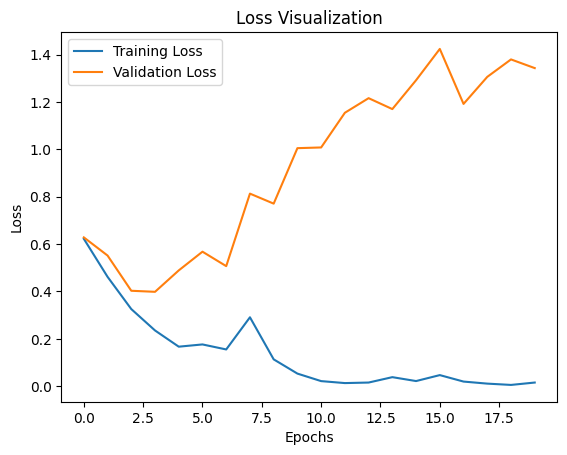

In [13]:
plt.plot(model.history.history["loss"], label="Training Loss")
plt.plot(model.history.history["val_loss"], label="Validation Loss")
plt.title("Loss Visualization")
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

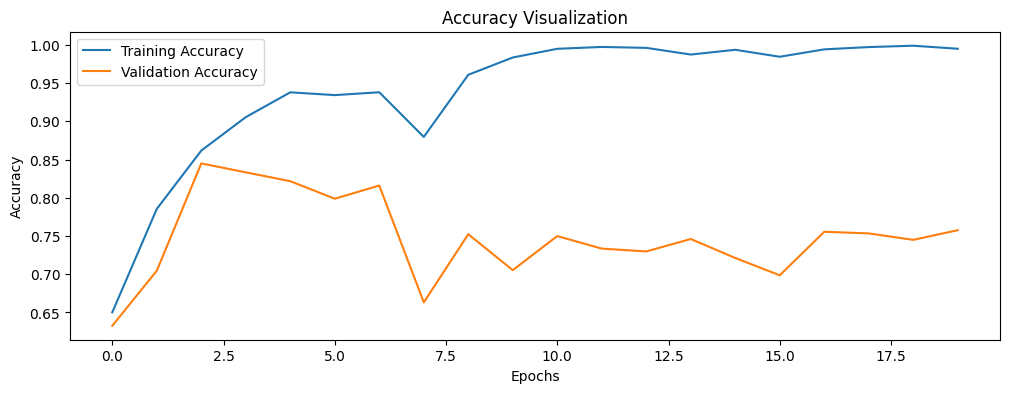

In [14]:
plt.figure(figsize=(12, 4))
plt.plot(model.history.history["accuracy"], label="Training Accuracy")
plt.plot(model.history.history["val_accuracy"], label="Validation Accuracy")
plt.title("Accuracy Visualization")
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.show()